In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
categorical = pd.read_csv('/Users/erinberardi/Downloads/categorical.csv')
numerical = pd.read_csv('/Users/erinberardi/Downloads/numerical-5.csv')
target = pd.read_csv('/Users/erinberardi/Downloads/target.csv')



In [3]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [4]:
categorical

,Unnamed: 0,OSOURCE,STATE,ZIP,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,0,GRI,IL,61081,36,U,F,3,NaN,NaN,L,E,C,T,2
1,1,BOA,CA,91326,14,H,M,3,NaN,NaN,L,G,A,S,1
2,2,AMH,NC,27017,43,U,M,3,NaN,NaN,L,E,C,R,2
3,3,BRY,CA,95953,44,U,F,3,NaN,NaN,L,E,C,R,2
4,4,NaN,FL,33176,16,H,F,3,12.0,NaN,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,ASE,other,99504,27,U,M,3,NaN,NaN,L,G,C,C,2
95408,95408,DCD,TX,77379,24,H,M,3,NaN,NaN,L,F,A,C,1
95409,95409,MBC,MI,48910,30,U,M,3,NaN,NaN,L,E,B,C,3
95410,95410,PRV,CA,91320,24,H,F,2,12.0,NaN,L,F,A,C,1


In [5]:
categorical.isna().sum()

Unnamed: 0        0
OSOURCE         928
STATE             0
ZIP               0
CLUSTER           0
HOMEOWNR          0
GENDER            0
DATASRCE          0
SOLIH         89212
VETERANS      84986
RFA_2R            0
RFA_2A            0
GEOCODE2          0
DOMAIN_A          0
DOMAIN_B          0
dtype: int64

In [6]:
cols_to_drop = ['OSOURCE','SOLIH','VETERANS','ZIP','Unnamed: 0']
cat = categorical.drop(cols_to_drop, axis=1)


### The data needs to be all numerical to use the K-Best after checking the Variance

In [7]:
cat

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,U,F,3,L,E,C,T,2
1,CA,14,H,M,3,L,G,A,S,1
2,NC,43,U,M,3,L,E,C,R,2
3,CA,44,U,F,3,L,E,C,R,2
4,FL,16,H,F,3,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...
95407,other,27,U,M,3,L,G,C,C,2
95408,TX,24,H,M,3,L,F,A,C,1
95409,MI,30,U,M,3,L,E,B,C,3
95410,CA,24,H,F,2,L,F,A,C,1


In [8]:
cat['GENDER'].value_counts(dropna=False)

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [9]:
cat["GENDER"].replace({"J": "U", "C": "U","A":"U"}, inplace=True)

In [10]:
X = pd.concat([numerical,cat],axis = 1)
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,0,60.000000,5,9,0,0,39,34,18,10,...,IL,36,U,F,3,L,E,C,T,2
1,1,46.000000,6,9,16,0,15,55,11,6,...,CA,14,H,M,3,L,G,A,S,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,NC,43,U,M,3,L,E,C,R,2
3,0,70.000000,1,4,2,0,23,14,31,3,...,CA,44,U,F,3,L,E,C,R,2
4,0,78.000000,3,2,60,1,28,9,53,26,...,FL,16,H,F,3,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,other,27,U,M,3,L,G,C,C,2
95408,1,48.000000,7,9,1,0,31,43,19,4,...,TX,24,H,M,3,L,F,A,C,1
95409,1,60.000000,5,9,0,0,18,46,20,7,...,MI,30,U,M,3,L,E,B,C,3
95410,0,58.000000,7,9,0,0,28,35,20,9,...,CA,24,H,F,2,L,F,A,C,1


In [11]:
full_data = pd.concat([X,target], axis=1)
full_data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,Unnamed: 0,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,F,3,L,E,C,T,2,0,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,M,3,L,G,A,S,1,1,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,M,3,L,E,C,R,2,2,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,F,3,L,E,C,R,2,3,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,F,3,L,F,A,S,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,M,3,L,G,C,C,2,95407,0,0.0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,M,3,L,F,A,C,1,95408,0,0.0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,M,3,L,E,B,C,3,95409,0,0.0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,F,2,L,F,A,C,1,95410,1,18.0


In [12]:
y =target['TARGET_B']
target_d = target['TARGET_D']
target_d.value_counts()
target

,Unnamed: 0,TARGET_B,TARGET_D
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
...,...,...,...
95407,95407,0,0.0
95408,95408,0,0.0
95409,95409,0,0.0
95410,95410,1,18.0


# here I train test split to focus on train features.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(66788, 325)

(28624, 325)

(66788,)

(28624,)

In [15]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [16]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
66785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
66786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [17]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28621,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [18]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)

(66788, 318)


In [19]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(28624, 318)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B
0,0.000014,0.402062,0.833333,1.000000,0.045643,0.000000,0.282828,0.333333,0.191919,0.030303,...,0.044405,0.004596,0.025036,0.696575,1.0,0.333333,0.180328,0.211538,0.0,0.000000
1,0.000000,0.762887,0.666667,1.000000,0.000000,0.010204,0.202020,0.333333,0.343434,0.101010,...,0.017762,0.001838,0.005545,0.783313,0.0,0.666667,0.327869,0.346154,1.0,0.333333
2,0.000000,0.525773,1.000000,1.000000,0.033195,0.000000,0.393939,0.191919,0.080808,0.131313,...,0.007105,0.003676,0.003605,0.352384,0.0,1.000000,0.098361,0.019231,1.0,0.000000
3,0.000000,0.546392,1.000000,1.000000,0.000000,0.000000,0.262626,0.202020,0.242424,0.151515,...,0.035524,0.021140,0.014479,0.768389,0.0,0.000000,0.016393,0.211538,0.5,0.000000
4,0.000014,0.567010,0.666667,0.666667,0.008299,0.000000,0.525253,0.080808,0.767677,0.090909,...,0.044405,0.016544,0.015270,0.707765,1.0,0.666667,0.032787,0.480769,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28619,0.000042,0.453608,0.166667,1.000000,0.000000,0.000000,0.252525,0.191919,0.353535,0.050505,...,0.035524,0.004596,0.005769,0.301621,1.0,0.000000,0.606557,0.326923,1.0,0.333333
28620,0.000389,0.773196,0.833333,0.444444,0.058091,0.000000,0.353535,0.090909,0.373737,0.050505,...,0.067496,0.014706,0.017329,0.128829,1.0,0.000000,0.868852,0.673077,1.0,0.333333
28621,0.000014,0.587629,0.500000,0.666667,0.095436,0.000000,0.424242,0.191919,0.272727,0.070707,...,0.044405,0.011029,0.017118,0.348937,1.0,0.000000,0.344262,0.288462,0.0,0.333333
28622,0.000000,0.624862,0.833333,1.000000,0.000000,0.000000,0.414141,0.191919,0.393939,0.020202,...,0.017762,0.004596,0.008144,0.668078,0.0,1.000000,0.295082,0.211538,0.5,0.000000


In [20]:
X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [21]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test
y_test.reset_index(drop = True, inplace = True)

# making full df for training set

In [22]:
data = pd.concat([X_train,y_train],axis = 1)
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,0.000014,0.546392,1.000000,0.222222,0.016598,0.000000,0.343434,0.232323,0.494949,0.020202,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.000389,0.278351,0.833333,1.000000,0.000000,0.030612,0.363636,0.393939,0.181818,0.070707,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,0.000000,0.618557,0.833333,1.000000,0.000000,0.000000,0.252525,0.252525,0.454545,0.070707,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
3,0.000389,0.752577,0.666667,1.000000,0.000000,0.051020,0.363636,0.323232,0.333333,0.040404,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.000014,0.608247,0.833333,0.888889,0.000000,0.010204,0.373737,0.404040,0.222222,0.050505,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66783,0.000000,0.624862,0.000000,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
66784,0.000014,0.628866,0.166667,0.222222,0.024896,0.020408,0.404040,0.313131,0.323232,0.060606,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
66785,0.000000,0.443299,0.666667,1.000000,0.000000,0.020408,0.404040,0.555556,0.141414,0.050505,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
66786,0.000000,0.624862,0.166667,1.000000,0.000000,0.000000,0.303030,0.222222,0.474747,0.080808,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [23]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train)
temp = sel.transform(X_train)
temp = pd.DataFrame(temp)
print(X_train.shape)
print(temp.shape)
                        

(66788, 342)
(66788, 105)


In [24]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

342

In [25]:
len(X_train.columns)

342

In [26]:
len(list(zip(X_train.columns,var_list)))

342

In [27]:
drop_list = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
len(drop_list)

237

## Here I can drop these columns but going to check the K-Best option to get even smaller # of features


In [28]:
data = data.drop(drop_list, axis = 1)
data

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,...,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,0.546392,1.000000,0.222222,0.232323,0.494949,0.333333,0.0,0.000000,1.000000,0.979798,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.278351,0.833333,1.000000,0.393939,0.181818,1.000000,1.0,0.000000,0.000000,0.919192,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,0.618557,0.833333,1.000000,0.252525,0.454545,0.222222,0.0,0.404040,0.606061,0.787879,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
3,0.752577,0.666667,1.000000,0.323232,0.333333,1.000000,1.0,0.000000,0.000000,0.959596,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.608247,0.833333,0.888889,0.404040,0.222222,1.000000,1.0,0.000000,0.000000,0.808081,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66783,0.624862,0.000000,0.777778,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.868687,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
66784,0.628866,0.166667,0.222222,0.313131,0.323232,0.222222,1.0,0.000000,0.000000,0.949495,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
66785,0.443299,0.666667,1.000000,0.555556,0.141414,1.000000,1.0,0.000000,0.000000,0.909091,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
66786,0.624862,0.166667,1.000000,0.222222,0.474747,1.000000,0.0,0.555556,0.454545,0.989899,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [29]:
X_train = X_train.drop(drop_list, axis = 1)
X_train

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.546392,1.000000,0.222222,0.232323,0.494949,0.333333,0.0,0.000000,1.000000,0.979798,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.278351,0.833333,1.000000,0.393939,0.181818,1.000000,1.0,0.000000,0.000000,0.919192,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.618557,0.833333,1.000000,0.252525,0.454545,0.222222,0.0,0.404040,0.606061,0.787879,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.752577,0.666667,1.000000,0.323232,0.333333,1.000000,1.0,0.000000,0.000000,0.959596,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.608247,0.833333,0.888889,0.404040,0.222222,1.000000,1.0,0.000000,0.000000,0.808081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66783,0.624862,0.000000,0.777778,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.868687,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66784,0.628866,0.166667,0.222222,0.313131,0.323232,0.222222,1.0,0.000000,0.000000,0.949495,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
66785,0.443299,0.666667,1.000000,0.555556,0.141414,1.000000,1.0,0.000000,0.000000,0.909091,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
66786,0.624862,0.166667,1.000000,0.222222,0.474747,1.000000,0.0,0.555556,0.454545,0.989899,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Adding in KBest

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=25).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(66788, 105)
(66788, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.000000,0.128000,0.137000,0.010101,0.050505,0.222222,0.525253,0.808081,0.000000,...,0.922701,0.000000,0.852459,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
1,0.833333,0.010101,0.230000,0.239333,0.111111,0.424242,0.767677,0.939394,0.989899,0.020202,...,0.962982,0.000000,0.065574,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.833333,0.212121,0.062667,0.075500,0.010101,0.020202,0.060606,0.131313,0.343434,0.000000,...,0.618243,0.666667,0.918033,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.010101,0.224167,0.226500,0.030303,0.292929,0.838384,1.000000,1.000000,0.000000,...,0.665763,0.666667,0.049180,0.666667,0.0,0.0,0.0,0.0,1.0,0.0
4,0.833333,0.080808,0.117833,0.120333,0.000000,0.000000,0.010101,0.333333,1.000000,0.000000,...,0.634309,0.000000,0.180328,0.000000,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
model = SelectKBest(chi2, k=25).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(105, 2)

,score,column_name
76,145.064893,RFA_2F
95,67.435219,RFA_2A_E
97,63.643242,RFA_2A_G
96,33.148930,RFA_2A_F
27,19.149527,HVP1
28,17.792848,HVP2
32,16.386960,HVP6
29,15.982457,HVP3
30,10.932243,HVP4
10,10.884496,ETH2


In [32]:
cols = df.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list = list(cols)
col_list

['RFA_2F',
 'RFA_2A_E',
 'RFA_2A_G',
 'RFA_2A_F',
 'HVP1',
 'HVP2',
 'HVP6',
 'HVP3',
 'HVP4',
 'ETH2',
 'RP1',
 'RP2',
 'HV1',
 'HV2',
 'CARDPROM',
 'STATE_GA',
 'DOMAIN_B',
 'STATE_IN',
 'HVP5',
 'MSA',
 'CONTROLN',
 'INCOME',
 'CLUSTER2',
 'STATE_IL',
 'RP3']

In [33]:
X_corr_data = data[['RFA_2F',
 'RFA_2A_E',
 'RFA_2A_G',
 'RFA_2A_F',
 'HVP1',
 'HVP2',
 'HVP6',
 'HVP3',
 'HVP4',
 'ETH2',
 'RP1',
 'RP2',
 'HV1',
 'HV2',
 'CARDPROM',
 'STATE_GA',
 'DOMAIN_B',
 'STATE_IN',
 'HVP5',
 'MSA',
 'CONTROLN',
 'INCOME',
 'CLUSTER2',
 'STATE_IL',
 'RP3']]

In [34]:
X_test_all = X_test[['RFA_2F',
 'RFA_2A_E',
 'RFA_2A_G',
 'RFA_2A_F',
 'HVP1',
 'HVP2',
 'HVP6',
 'HVP3',
 'HVP4',
 'ETH2',
 'RP1',
 'RP2',
 'HV1',
 'HV2',
 'CARDPROM',
 'STATE_GA',
 'DOMAIN_B',
 'STATE_IN',
 'HVP5',
 'MSA',
 'CONTROLN',
 'INCOME',
 'CLUSTER2',
 'STATE_IL',
 'RP3']]

In [35]:
X_test_all

,RFA_2F,RFA_2A_E,RFA_2A_G,RFA_2A_F,HVP1,HVP2,HVP6,HVP3,HVP4,ETH2,...,STATE_GA,DOMAIN_B,STATE_IN,HVP5,MSA,CONTROLN,INCOME,CLUSTER2,STATE_IL,RP3
0,0.333333,0.0,1.0,0.0,0.050505,0.161616,0.000000,0.515152,0.848485,0.000000,...,0.0,0.000000,0.0,0.979798,0.115385,0.696575,0.833333,0.180328,0.0,0.858586
1,0.666667,1.0,0.0,0.0,0.555556,0.868687,0.050505,0.989899,1.000000,0.020202,...,0.0,0.333333,0.0,1.000000,0.478632,0.783313,0.666667,0.327869,0.0,0.989899
2,1.000000,0.0,0.0,0.0,0.252525,0.555556,0.050505,0.858586,0.979798,0.737374,...,0.0,0.000000,0.0,1.000000,0.230769,0.352384,1.000000,0.098361,0.0,0.505051
3,0.000000,0.0,0.0,1.0,0.959596,0.979798,0.848485,0.979798,0.989899,0.000000,...,0.0,0.000000,0.0,0.989899,0.478632,0.768389,1.000000,0.016393,0.0,0.949495
4,0.666667,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.333333,0.0,0.000000,0.662393,0.707765,0.666667,0.032787,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28619,0.000000,0.0,0.0,1.0,0.010101,0.020202,0.000000,0.161616,0.424242,0.000000,...,0.0,0.333333,0.0,0.848485,0.175214,0.301621,0.166667,0.606557,0.0,0.191919
28620,0.000000,0.0,1.0,0.0,0.020202,0.040404,0.000000,0.101010,0.181818,0.414141,...,0.0,0.333333,0.0,0.434343,0.000000,0.128829,0.833333,0.868852,0.0,0.121212
28621,0.000000,0.0,1.0,0.0,0.060606,0.121212,0.010101,0.282828,0.464646,0.000000,...,0.0,0.333333,0.0,0.808081,0.230769,0.348937,0.500000,0.344262,0.0,0.707071
28622,1.000000,1.0,0.0,0.0,0.000000,0.010101,0.000000,0.040404,0.262626,0.010101,...,0.0,0.000000,0.0,0.828283,0.491453,0.668078,0.833333,0.295082,0.0,0.919192


# Looking at multicolinearity

In [ ]:
corr_matrix = X_corr_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

# Plots to look at best multi-collinearity.

In [ ]:
col_viz = ['HVP1','HVP2','HVP3','HVP4','HVP5','HVP6','HV1','HV2']

In [ ]:
for column in X_corr_data[col_viz]:
    sns.histplot( x=X_corr_data[column])
    plt.show()

In [36]:
col_to_drop = ['HVP1','HVP2','HVP3','HVP5','HVP6','HV2']
# HVP4 I will keep as it has high correlation with the target column.  Maybe look at correlation with Target D

In [37]:
X_train = X_corr_data.drop(['HVP1','HVP2','HVP3','HVP5','HVP6','HV2'], axis = 1)
X_train.shape
X_test = X_test_all.drop(['HVP1','HVP2','HVP3','HVP5','HVP6','HV2'], axis = 1)
X_test

,RFA_2F,RFA_2A_E,RFA_2A_G,RFA_2A_F,HVP4,ETH2,RP1,RP2,HV1,CARDPROM,STATE_GA,DOMAIN_B,STATE_IN,MSA,CONTROLN,INCOME,CLUSTER2,STATE_IL,RP3
0,0.333333,0.0,1.0,0.0,0.848485,0.000000,0.242424,0.313131,0.167833,0.116667,0.0,0.000000,0.0,0.115385,0.696575,0.833333,0.180328,0.0,0.858586
1,0.666667,1.0,0.0,0.0,1.000000,0.020202,0.848485,0.979798,0.344833,0.333333,0.0,0.333333,0.0,0.478632,0.783313,0.666667,0.327869,0.0,0.989899
2,1.000000,0.0,0.0,0.0,0.979798,0.737374,0.000000,0.505051,0.265167,0.233333,0.0,0.000000,0.0,0.230769,0.352384,1.000000,0.098361,0.0,0.505051
3,0.000000,0.0,0.0,1.0,0.989899,0.000000,0.757576,0.868687,0.680833,0.200000,0.0,0.000000,0.0,0.478632,0.768389,1.000000,0.016393,0.0,0.949495
4,0.666667,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667,0.0,0.333333,0.0,0.662393,0.707765,0.666667,0.032787,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28619,0.000000,0.0,0.0,1.0,0.424242,0.000000,0.131313,0.131313,0.118833,0.400000,0.0,0.333333,0.0,0.175214,0.301621,0.166667,0.606557,0.0,0.191919
28620,0.000000,0.0,1.0,0.0,0.181818,0.414141,0.010101,0.020202,0.077000,0.500000,0.0,0.333333,0.0,0.000000,0.128829,0.833333,0.868852,0.0,0.121212
28621,0.000000,0.0,1.0,0.0,0.464646,0.000000,0.111111,0.383838,0.118833,0.150000,0.0,0.333333,0.0,0.230769,0.348937,0.500000,0.344262,0.0,0.707071
28622,1.000000,1.0,0.0,0.0,0.262626,0.010101,0.202020,0.565657,0.109167,0.166667,0.0,0.000000,0.0,0.491453,0.668078,0.833333,0.295082,0.0,0.919192


In [38]:
X_train.columns

Index(['RFA_2F', 'RFA_2A_E', 'RFA_2A_G', 'RFA_2A_F', 'HVP4', 'ETH2', 'RP1',
       'RP2', 'HV1', 'CARDPROM', 'STATE_GA', 'DOMAIN_B', 'STATE_IN', 'MSA',
       'CONTROLN', 'INCOME', 'CLUSTER2', 'STATE_IL', 'RP3'],
      dtype='object')

In [39]:
X_test.columns

Index(['RFA_2F', 'RFA_2A_E', 'RFA_2A_G', 'RFA_2A_F', 'HVP4', 'ETH2', 'RP1',
       'RP2', 'HV1', 'CARDPROM', 'STATE_GA', 'DOMAIN_B', 'STATE_IN', 'MSA',
       'CONTROLN', 'INCOME', 'CLUSTER2', 'STATE_IL', 'RP3'],
      dtype='object')

# Let's run a model with the chosen features.

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.9488081691321795
TestSet =  0.9502515371716043


In [41]:
y_train.value_counts()
# imbalanced

0    63369
1     3419
Name: TARGET_B, dtype: int64

In [42]:
for_over_sample = pd.concat([X_train,y_train], axis=1)

In [43]:
for_over_sample.shape


(66788, 20)

# Fixing imbalance

In [44]:
#balacning data - upsampling
no_donate = for_over_sample[for_over_sample['TARGET_B']==0]
yes_donate = for_over_sample[for_over_sample['TARGET_B']==1]

from sklearn.utils import resample
yes_donate_oversampled = resample(yes_donate, 
                                    replace=True,
                                    n_samples = len(no_donate),
                                    random_state=42)


display(no_donate.shape)
display(yes_donate_oversampled.shape)

(63369, 20)

(63369, 20)

In [45]:
oversampled_target = pd.concat([no_donate,yes_donate_oversampled], axis = 0)

# scrambled rows to avoid yes/no clusters
oversampled_total = oversampled_target.sample(frac=1)

X_train_oversampled = oversampled_total.drop(['TARGET_B'], axis = 1)

y_train_oversampled =oversampled_total['TARGET_B']

In [46]:
display(X_train_oversampled.shape)
display(y_train_oversampled.shape)

(126738, 19)

(126738,)

In [47]:
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train_oversampled, y_train_oversampled)
print('TrainSet = ',clf.score(X_train_oversampled, y_train_oversampled))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.607418453818113
TestSet =  0.6084055338177753


In [ ]:
# from sklearn.model_selection import cross_val_score

# cross_val_scores = cross_val_score(clf, X_train_oversampled, y_train_oversampled, cv=10)
# print(np.mean(cross_val_scores))
# print(cross_val_scores)


In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [49]:

# pred_RF = clf.predict(X_test)

# print('accuracy:', accuracy_score(y_test, pred_RF))
# print("precision: ",precision_score(y_test,pred_RF))
# print("recall: ",recall_score(y_test,pred_RF))
# print("f1: ",f1_score(y_test,pred_RF))

In [50]:
data_targetD = full_data[full_data['TARGET_B']==1]
data_targetD

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,Unnamed: 0,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,...,F,3,L,D,A,S,1,20,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,...,M,3,L,D,A,T,1,30,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,...,F,3,L,D,C,C,1,45,1,5.0
78,0,69.000000,6,9,0,0,34,20,54,2,...,F,2,L,F,A,S,1,78,1,13.0
93,1,73.000000,1,7,10,0,21,53,8,5,...,M,3,L,E,A,S,2,93,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,F,3,L,F,A,T,2,95298,1,20.0
95309,0,51.000000,5,6,1,1,32,43,24,7,...,F,3,L,F,B,S,1,95309,1,15.0
95398,0,86.000000,5,9,0,1,32,21,26,9,...,F,3,L,G,B,S,1,95398,1,3.0
95403,0,58.000000,4,9,0,0,24,46,20,6,...,F,2,L,F,D,R,2,95403,1,10.0


In [51]:
data_targetD['TARGET_D'].value_counts()

10.00     941
15.00     591
20.00     577
5.00      503
25.00     392
         ... 
13.92       1
16.87       1
101.00      1
150.00      1
18.25       1
Name: TARGET_D, Length: 70, dtype: int64

In [52]:
data_targetD['TARGET_D'].mean()

15.624344414619037

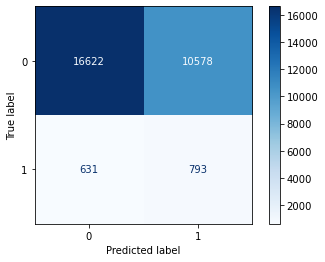

In [53]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

In [54]:
donation_gained = 801 * 15.6
donation_lost = 10738 * 15.6
unexpected_donation = 623 * 15.6
spend_marketing = (10738+801) * 0.79
no_return_marketing = 10808 * 0.79

print('Donation amount gained:',round(donation_gained,2))
print('Donation amount lost:',round(donation_lost,2))
print('Unexpected Donations:',round(unexpected_donation,2))
print('Amount spend on marketing:',round(spend_marketing,2))
print('Amount lost on marketing:',round(no_return_marketing,2))

Donation amount gained: 12495.6
Donation amount lost: 167512.8
Unexpected Donations: 9718.8
Amount spend on marketing: 9115.81
Amount lost on marketing: 8538.32


### In the above plot we can see that there are 623 people of whom the model predicts they won't donate, when they actually would donate, AKA falsely predicted non-donators. There are also 10738 people of whom the model predicts they will donate, when they actually don't. When we look at the average donation amount of someone who actually donates this lays around 15.62 dollars. It also becomes clear in the calculations above, we can see that with the current model we miss out on 167512 dollars of donations by not sending marketing efforts to these 10738 falsely predicted non-donators. This is a huge amount when you see that we only raise 12495 dollars with this model. 

Zooming in on the costs to send the marketing packages: in this scenario we spend a total of 9115.81​ dollars on marketing. Of which 8538 dollars does not yield any donation. When we compare this with the 167512 dollars we are missing out on by not sending them anything. 

We can clearly conclude that it's in the best interest of Healthcare 4 All to have a model in which we have the lowest amount of falsely predicted non-donators. With this model we can see that the donation amount lost is almost equal to the Unexpected Donations gained.This model would need to be imroved to optimize for the Falsely Predicted non- donators who would actually donate.

# Predicting amount given among actual donators

In [55]:
X_D = data_targetD.drop(['TARGET_D', 'TARGET_B', 'Unnamed: 0'], axis=1)
y_D = data_targetD['TARGET_D']
display(X_D)
display(y_D)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
20,2,62.000000,3,8,10,2,25,40,27,11,...,other,12,H,F,3,L,D,A,S,1
30,0,61.611649,5,9,0,1,37,58,16,8,...,TX,35,U,M,3,L,D,A,T,1
45,0,66.000000,5,9,5,0,33,24,39,6,...,other,24,H,F,3,L,D,C,C,1
78,0,69.000000,6,9,0,0,34,20,54,2,...,CA,13,H,F,2,L,F,A,S,1
93,1,73.000000,1,7,10,0,21,53,8,5,...,GA,18,H,M,3,L,E,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,CA,36,U,F,3,L,F,A,T,2
95309,0,51.000000,5,6,1,1,32,43,24,7,...,CA,12,H,F,3,L,F,B,S,1
95398,0,86.000000,5,9,0,1,32,21,26,9,...,WI,11,U,F,3,L,G,B,S,1
95403,0,58.000000,4,9,0,0,24,46,20,6,...,other,49,H,F,2,L,F,D,R,2


20        4.0
30        7.0
45        5.0
78       13.0
93       10.0
         ... 
95298    20.0
95309    15.0
95398     3.0
95403    10.0
95410    18.0
Name: TARGET_D, Length: 4843, dtype: float64

In [56]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_D, y_D, test_size=0.2, random_state=42)

In [57]:
X_train_cat1 = X_train1.select_dtypes(include = object)
X_train_num1 =X_train1.select_dtypes(include = np.number)
X_test_cat1 = X_test1.select_dtypes(include = object)
X_test_num1 =X_test1.select_dtypes(include = np.number)

In [58]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat1)

cols1 = encoder.get_feature_names(input_features=X_train_cat1.columns)

X_train_cat_encode1 = pd.DataFrame(encoder.transform(X_train_cat1).toarray(),columns=cols1)

X_train_cat_encode1.reset_index(drop = True, inplace = True)
X_train_cat_encode1

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [59]:
cols = encoder.get_feature_names(input_features=X_test_cat1.columns)

X_test_cat_encode1 = pd.DataFrame(encoder.transform(X_test_cat1).toarray(),columns=cols)

X_test_cat_encode1.reset_index(drop = True, inplace = True)
X_test_cat_encode1

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
966,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [60]:
transformer = MinMaxScaler().fit(X_train_num1)
X_train_num_norm1 = transformer.transform(X_train_num1)
print(X_train_num_norm1.shape)
X_train_num_scale1 = pd.DataFrame(X_train_num_norm1, index = X_train_num1.index, columns=X_train_num1.columns)
X_train_num_scale1.head()
X_train_num_scale1.reset_index(drop = True, inplace = True)

(3874, 318)


In [61]:
X_test_num_norm1 = transformer.transform(X_test_num1)
print(X_test_num_norm1.shape)
X_test_num_scale1 = pd.DataFrame(X_test_num_norm1, index = X_test_num1.index, columns=X_test_num1.columns)
X_test_num_scale1.head()
X_test_num_scale1.reset_index(drop = True, inplace=True)
X_test_num_scale1

(969, 318)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B
0,0.000000,0.925532,0.166667,0.111111,0.008333,0.000000,0.278481,0.454545,0.414141,0.083333,...,0.060000,0.193548,0.054013,0.506855,1.0,0.000000,0.836066,0.711538,1.0,0.333333
1,0.000026,0.712766,0.500000,0.333333,0.020833,0.000000,0.303797,0.434343,0.282828,0.104167,...,0.022222,0.161290,0.017543,0.033327,1.0,0.000000,0.540984,0.500000,1.0,0.333333
2,0.000718,0.563830,0.666667,1.000000,0.000000,0.031250,0.278481,0.323232,0.111111,0.020833,...,0.033333,0.274194,0.020635,0.622401,1.0,0.000000,0.377049,0.403846,1.0,0.000000
3,0.000026,0.680851,1.000000,0.000000,0.091667,0.000000,0.468354,0.383838,0.303030,0.083333,...,0.037778,0.032258,0.029941,0.694238,1.0,0.333333,1.000000,1.000000,1.0,0.666667
4,0.000051,0.612890,0.666667,1.000000,0.000000,0.208333,0.417722,0.393939,0.242424,0.104167,...,0.017778,0.177419,0.009049,0.110196,0.0,1.000000,0.950820,0.807692,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.000000,0.612890,0.666667,1.000000,0.000000,0.010417,0.291139,0.272727,0.505051,0.187500,...,0.033333,0.080645,0.009757,0.292584,0.0,0.333333,0.590164,0.769231,1.0,0.666667
965,0.000000,0.691489,1.000000,0.888889,0.062500,0.000000,0.594937,0.363636,0.434343,0.270833,...,0.011111,0.064516,0.006283,0.739835,1.0,0.666667,0.229508,0.653846,1.0,0.000000
966,0.000000,0.617021,0.666667,0.777778,0.000000,0.010417,0.354430,0.292929,0.222222,0.125000,...,0.022222,0.161290,0.014493,0.477115,0.0,0.666667,0.065574,0.211538,1.0,0.000000
967,0.000026,0.808511,1.000000,0.444444,0.008333,0.000000,0.506329,0.313131,0.393939,0.125000,...,0.035556,0.064516,0.009627,0.369464,1.0,0.000000,0.672131,0.846154,1.0,0.333333


In [75]:
X_train1 = pd.concat([X_train_num_scale1,X_train_cat_encode1], axis=1)
X_train1.index
y_train1.reset_index(drop = True, inplace = True)

In [76]:
X_test1 = pd.concat([X_test_num_scale1,X_test_cat_encode1], axis=1)
X_test1
y_test1.reset_index(drop = True, inplace = True)

# Feature Selection

In [64]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train1)
temp = sel.transform(X_train1)
temp = pd.DataFrame(temp)
print(X_train1.shape)
print(temp.shape)
                        

(3874, 342)
(3874, 118)


In [65]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
var_list
print(var_list.count(True))
print(var_list.count(False))

118
224


In [66]:
zipped = list(zip(X_train.columns,var_list))
len(zipped)

19

In [67]:
drop_list = [col[0] for col in zip(X_train1.columns,var_list) if col[1] == False]
print(drop_list)
drop_list = drop_list +['HVP1','HVP2','HVP3','HVP5','HVP6','HV2']
len(drop_list)

['TCODE', 'HIT', 'MALEMILI', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'POP901', 'POP902', 'POP903', 'POP90C4', 'POP90C5', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN1', 'HHN2', 'HHN4', 'HHN5', 'HHN6', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'HHP1', 'HHP2', 'DW3', 'DW7', 'DW8', 'DW9', 'HU3', 'HU4', 'HHD1', 'HHD4', 'HHD5', 'HHD6', 'HHD7', 'HHD8', 'HHD9', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC3', 'ETHC4', 'ETHC5', 'ETHC6', 'HUR1', 'RHP1', 'RHP2', 'RHP3', 'RHP4', 'HUPA1', 'HUPA4', 'HUPA5', 'HUPA7', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12', 'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC21', 'IC22', 'IC23', 'HHAS2', 'HHAS4', 'MC3', 'TP

230

In [1]:
#drop_list

In [69]:
X_train1 = X_train1.drop(drop_list, axis = 1)
X_train1

,AGE,INCOME,WEALTH1,MALEVET,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.361702,0.166667,1.0,0.278481,0.585859,0.000000,1.000000,0.141414,0.0,0.868687,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.489362,0.666667,1.0,0.518987,0.656566,0.050505,1.000000,0.000000,0.0,1.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.436170,0.833333,1.0,0.443038,0.343434,0.323232,1.000000,1.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.612890,0.666667,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.010101,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.425532,0.000000,1.0,0.544304,0.252525,0.303030,1.000000,1.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.457447,0.666667,1.0,0.417722,0.363636,0.252525,1.000000,0.000000,0.0,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3870,0.500000,1.000000,1.0,0.329114,0.424242,0.121212,1.000000,1.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3871,0.627660,0.666667,1.0,0.569620,0.121212,0.323232,0.777778,0.000000,0.0,1.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3872,0.936170,0.166667,1.0,0.392405,0.171717,0.313131,0.222222,0.000000,0.0,1.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [70]:
X_test1 = X_test1.drop(drop_list, axis = 1)
X_test1

,AGE,INCOME,WEALTH1,MALEVET,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.925532,0.166667,0.111111,0.278481,0.454545,0.414141,0.111111,0.0,0.787879,0.222222,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.712766,0.500000,0.333333,0.303797,0.434343,0.282828,0.333333,1.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.563830,0.666667,1.000000,0.278481,0.323232,0.111111,0.555556,1.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.680851,1.000000,0.000000,0.468354,0.383838,0.303030,1.000000,0.0,0.959596,0.050505,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.612890,0.666667,1.000000,0.417722,0.393939,0.242424,0.333333,0.0,0.000000,1.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.612890,0.666667,1.000000,0.291139,0.272727,0.505051,0.666667,0.0,1.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
965,0.691489,1.000000,0.888889,0.594937,0.363636,0.434343,0.444444,0.0,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
966,0.617021,0.666667,0.777778,0.354430,0.292929,0.222222,1.000000,1.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,0.808511,1.000000,0.444444,0.506329,0.313131,0.393939,0.333333,0.0,0.000000,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# PCA - Principle Component Analysis

In [82]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(0.9)
pca.fit(X_train1)

X_train_pca = pca.transform(X_train1)
X_test_pca = pca.transform(X_test1)

corr_pc = pd.DataFrame(X_train_pca).corr()



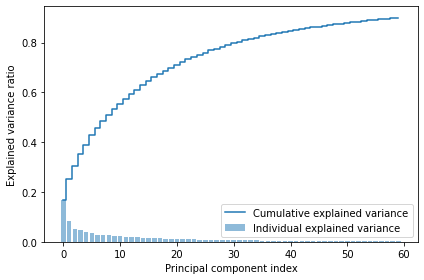

In [89]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)


# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [96]:
print(X_train1.shape)
print(X_test1.shape)
print (y_train1.shape)
print(y_test1.shape)

(3874, 342)
(969, 342)
(3874,)
(969,)


# Run regression models

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


In [78]:
def models_automation(models, X_train1, y_train1):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


In [79]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train1, y_train1)

LinearRegression: Train -> 0.008764755123584544, Test -> 0.008353284724222032
SGDRegressor: Train -> 0.00711358168538978, Test -> 0.006005438929060802
KNeighborsRegressor: Train -> 0.20565358964661662, Test -> -0.1934155320555191
MLPRegressor: Train -> 0.011318020591143174, Test -> 0.0016488250154430562
DecisionTreeRegressor: Train -> 1.0, Test -> -1.329365499008592
RandomForestRegressor: Train -> 0.8523284301624181, Test -> -0.05709769315928592


## RFE option, not used.

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# # define the method
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
# # fit the model
# rfe.fit(X_train, y_train)
# # transform the data
# X, y = rfe.transform(X_train, y_train)